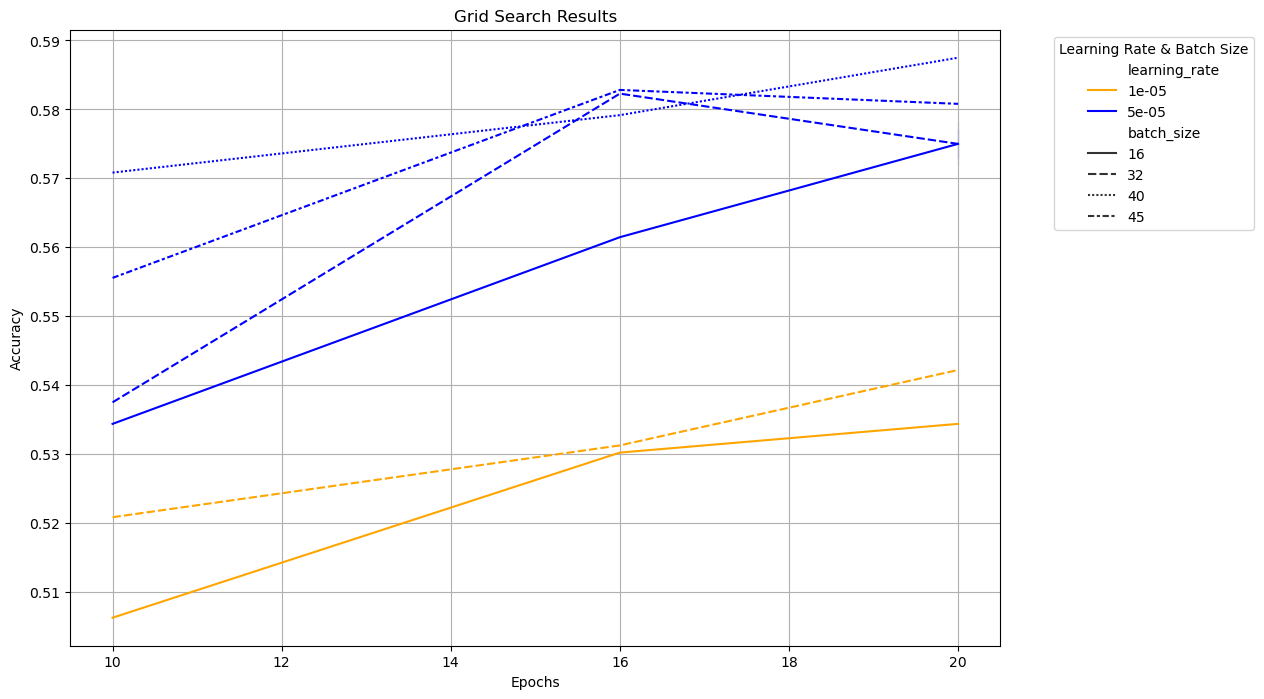

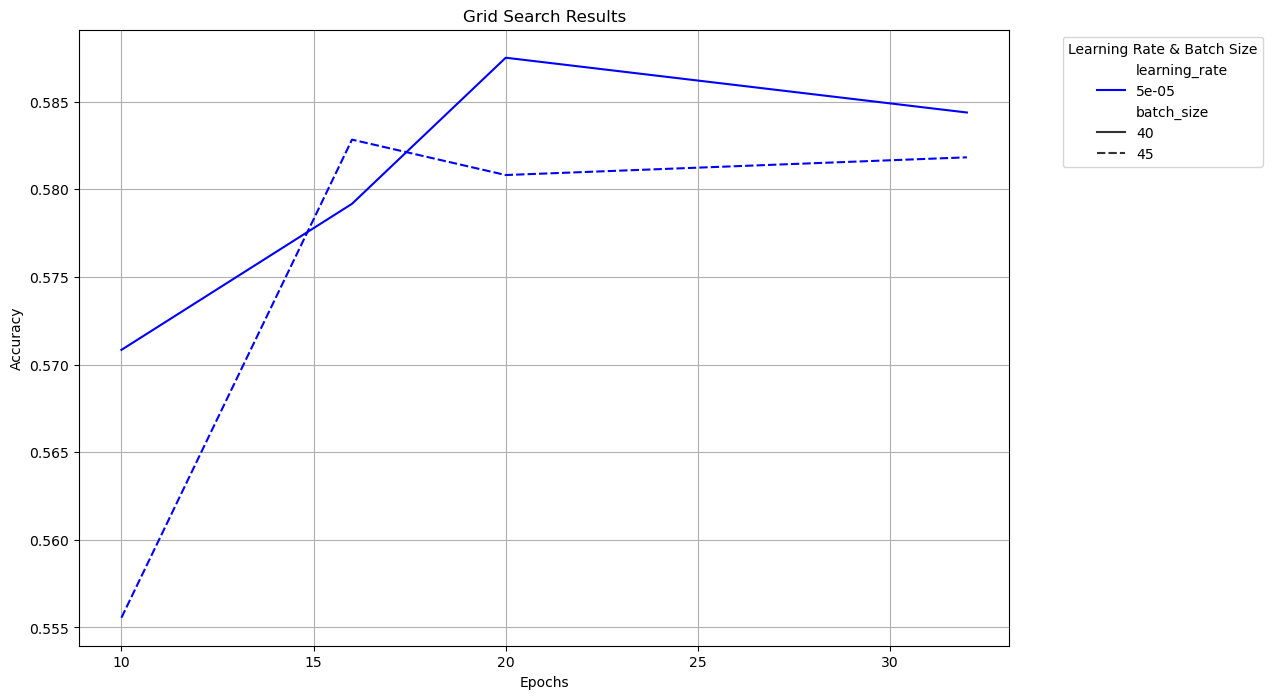

In [20]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to load JSON lines
def load_json_lines(file_path):
    with open(file_path, 'r') as f:
        return [json.loads(line) for line in f]

# Load the grid search results from the file
grid_search_results = load_json_lines(log_hyp_path)

def plot_grid_search_results(grid_search_results, filter_epochs=None, filter_lr=None, filter_batch_sizes=None, color_palette=None):
    df = pd.DataFrame(grid_search_results)
    df['learning_rate'] = df['hyperparameters'].apply(lambda x: x['learning_rate'])
    df['batch_size'] = df['hyperparameters'].apply(lambda x: x['batch_size'])
    df['epochs'] = df['hyperparameters'].apply(lambda x: x['epochs'])

    if filter_epochs is not None:
        df = df[df['epochs'] <= filter_epochs]
    
    if filter_lr is not None:
        df = df[df['learning_rate'] == filter_lr]
    
    if filter_batch_sizes is not None:
        df = df[df['batch_size'].isin(filter_batch_sizes)]

    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=df, 
        x='epochs', 
        y='accuracy', 
        hue='learning_rate', 
        style='batch_size', 
        palette=color_palette
    )
    plt.title('Grid Search Results')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(title='Learning Rate & Batch Size', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

color_palette = {1e-05: 'orange', 5e-05: 'blue'}




In [ ]:
# Updated folder path
log_hyp_path = '../hyperparameters_log/hyperparameter_log_camembert.json'

# Plot 1: All learning rates and batch sizes, but only epochs <= 20
plot_grid_search_results(grid_search_results, filter_epochs=20, color_palette=color_palette)

# Plot 2: Only learning rate 5e-05 and batch sizes 40 and 45, with all epochs
plot_grid_search_results(grid_search_results, filter_lr=5e-05, filter_batch_sizes=[40, 45], color_palette=color_palette)